In [2]:
# !pip install -q gym
# !pip install -q keras-rl2
# !pip install -q gym[classic_control]

     |████████████████████████████████| 52 kB 769 kB/s 
     |████████████████████████████████| 18.3 MB 135 kB/s 


In [2]:
import gym
import random
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy
import matplotlib.pyplot as plt

In [3]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
# env = gym.make('CartPole-v1')


In [4]:
episodes = 10
for episode in range(1,episodes+1):
    # At each begining reset the game 
    state = env.reset()
    # set done to False
    done = False
    # set score to 0
    score = 0
    # while the game is not finished
    while not done:
        # visualize each step
        env.render()
        # choose a random action
        action = random.choice([0,1])
        # execute the action
        n_state, reward, done, info, _ = env.step(action)
        # keep track of rewards
        score+=reward
    print('episode {} score {}'.format(episode, score))

episode 1 score 63.0
episode 2 score 25.0
episode 3 score 15.0
episode 4 score 11.0
episode 5 score 16.0
episode 6 score 9.0
episode 7 score 29.0
episode 8 score 15.0
episode 9 score 29.0
episode 10 score 15.0


In [5]:
states = env.observation_space.shape[0]
actions = env.action_space.n
states, actions

(4, 2)

In [6]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [7]:
def agent(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape = (1, states)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model
  
model = agent(env.observation_space.shape[0], env.action_space.n)

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
env.reset()
val = env.render()
val.shape

(400, 600, 3)

In [10]:
policy = EpsGreedyQPolicy()

In [11]:
sarsa = SARSAAgent(model = model, policy = policy, nb_actions = env.action_space.n)

In [12]:
sarsa.compile('adam', metrics = ['mse'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
history = sarsa.fit(env, nb_steps=10, visualize = False, verbose = 1)

Training for 10 steps ...
Interval 1 (0 steps performed)


c:\Users\QuanNguyen\anaconda3\envs\ml_proj_py39\lib\site-packages\rl\agents\sarsa.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch = np.array(batch)


ValueError: Error when checking input: expected flatten_input to have shape (1, 4) but got array with shape (1, 2)

In [27]:
loss = [6.945, 7.341, 11.264, 8.297]
interval = [1, 2, 3, 4]

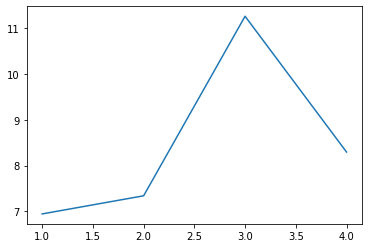

In [30]:
plt.plot(interval, loss)

In [37]:
scores = sarsa.test(env, nb_episodes = 100, visualize= True)
history = scores.history['episode_reward']

Testing for 100 episodes ...


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


error: ignored